In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# سوال ۶

In [ ]:
iris_data = pd.read_csv('/content/drive/MyDrive/Iris.csv')
iris_data

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
iris_data['Class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

<div dir=rtl>
در این قسمت ابتدا پس از خواندن داده ها، با تابع plt.scatter() داده ها را میکشیم. این طور که مشخص است دو feature عه 'Sepal_Length','Petal_Width' دو feature ای هستند که این داده ها را بهتر میتوانند از یکدیگر جدا کنند و در نتیجه با بررسی این دو ویژگی طبقه بند ما بهتر عمل خواهد کرد.
</div>


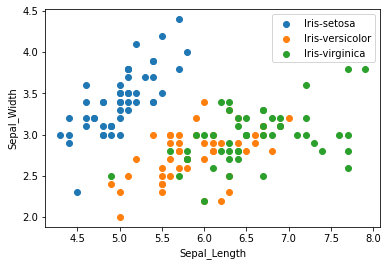

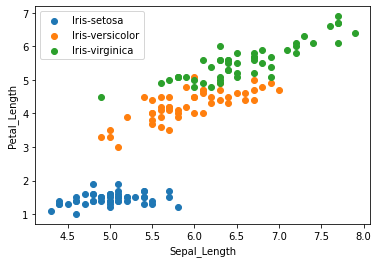

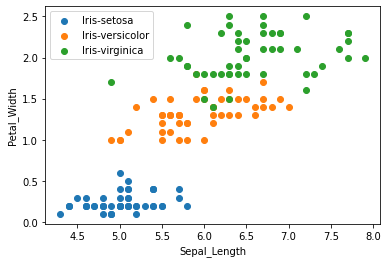

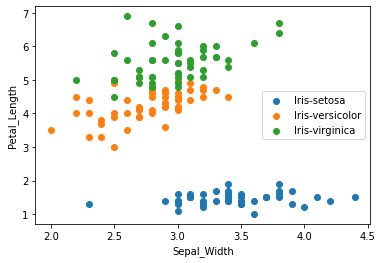

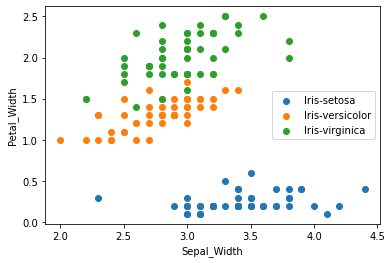

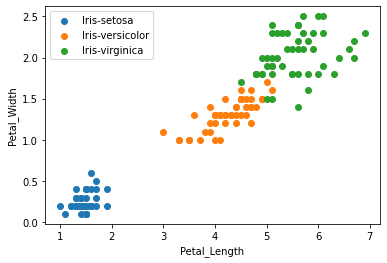

In [ ]:
def draw_scatter_plots(X1,X2,X3,features1,features2):
  for f1,f2 in zip(features1,features2):
    plt.scatter(X1[f1], X1[f2], label = "Iris-setosa")
    plt.scatter(X2[f1], X2[f2], label = "Iris-versicolor")
    plt.scatter(X3[f1], X3[f2], label = "Iris-virginica")
    plt.xlabel(f1)
    plt.ylabel(f2)
    plt.legend()
    plt.show()

features1 = ['Sepal_Length','Sepal_Length','Sepal_Length','Sepal_Width','Sepal_Width','Petal_Length']
features2 = ['Sepal_Width','Petal_Length','Petal_Width','Petal_Length','Petal_Width','Petal_Width']

X1 = iris_data[iris_data['Class'] == 'Iris-setosa']
X2 = iris_data[iris_data['Class'] == 'Iris-versicolor']
X3 = iris_data[iris_data['Class'] == 'Iris-virginica']
draw_scatter_plots(X1,X2,X3,features1,features2)

<div dir=rtl>در این بخش یک کلاس تعریف کرده ایم. در تابع fit ابتدا داده ها ست می شوند به این صورت که داده های هر ۳ کلاس داده شده از یک دیگر جدا می شوند. در بخش predict ابتدا مرکز هر کلاس مشخص می شود. سپس با صدا زدن تابع find_nearest_centroid نزدیک ترین مرکز به این صورت پیدا میشود که فاصله داده تا ۳ مرکز دسته را با فاصله اقلیدوسی به دست می آوریم و نزدیک ترین را انتخاب میکنیم. در ادامه لیبل مربوط به نزدیک ترین مرکز را به عنوان لیبل پیشبینی شده اعلام میکنیم.
</div>


In [ ]:
class nearestCentroidClassifier():
  def __init__(self):
    self.X = []
    self.centroids = []
    
  def fit(self,X_train,y_train):
    self.labels = y_train.unique()
    for i in self.labels:
      x = X_train.loc[y_train[y_train == i].index].reset_index().drop(columns=['index'])
      self.X.append(x)

  def get_euclidean_dist(self,x,y):
    return np.sqrt( np.sum( np.square( x - y ) ) )

  def find_nearest_centroid(self, new_data):
    new_data_distances = []
    for centroid in self.centroids:
      new_data_distances.append(self.get_euclidean_dist(centroid,new_data))
    centroids_labels_array = np.array(new_data_distances)
    indexes = centroids_labels_array.argsort()
    return indexes[0]
  
  def predict(self,X_test):
    for x in self.X:
      centroid = []
      for feature in x.columns:
        centroid.append(x[feature].mean(axis=0))
      self.centroids.append(np.array(centroid))
    y_pred = []
    for i in np.array(X_test):
      label_index = self.find_nearest_centroid(i)
      y_pred.append(self.labels[label_index])

    return np.array(y_pred) 

  def score(self,X_test, y_test):
    y_pred = self.predict(X_test)
    return len(y_test[y_test == y_pred]) / len(y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def draw_cm(y_true, y_pred, class_names):
  cm = confusion_matrix(y_true, y_pred)
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title('Confusion matrix')
  plt.colorbar()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names, rotation=45)
  plt.yticks(tick_marks, class_names)
  thresh = cm.max() / 3.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, cm[i, j],
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X = iris_data[['Sepal_Length','Petal_Width']]
y = iris_data['Class']
y.replace({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2},inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

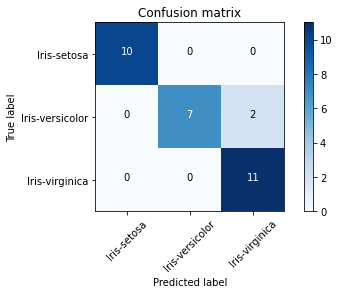

train accuracy:  0.8333333333333334
test accuracy:  0.9333333333333333


In [ ]:
ncc = nearestCentroidClassifier()
ncc.fit(X_train,y_train)
y_pred = ncc.predict(X_test)
draw_cm(y_test,y_pred,['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
print('train accuracy: ', ncc.score(X_train,y_train))
print('test accuracy: ', ncc.score(X_test,y_test))

<div dir=rtl>حال در این بخش از تابع پیاده سازی شده در کتابخانه sklearn استفاده میکنیم. همانطور که مشخص است جواب های ما به جواب های این کتابخانه بسیار نزدیک است و درواقع یکی است
</div>


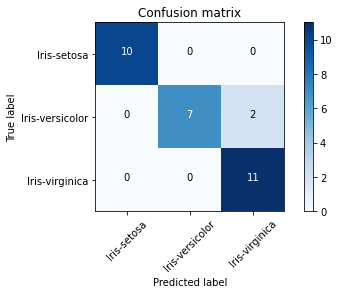

train accuracy:  0.8333333333333334
test accuracy:  0.9333333333333333


In [ ]:
from sklearn.neighbors import NearestCentroid
clf = NearestCentroid()
clf.fit(X_train.to_numpy(), y_train.to_numpy())
y_pred = clf.predict(X_test.to_numpy())
draw_cm(y_test,y_pred,['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
print('train accuracy: ', clf.score(X_train.to_numpy(),y_train.to_numpy()))
print('test accuracy: ', clf.score(X_test.to_numpy(),y_test.to_numpy()))

<div dir=rtl>در این قسمت با تابع roc_curve و RocCurveDisplay از sklearn نمودار های roc را رسم میکنیم و مساحت زیر هر نمودار که همان auc است را چاپ کرده ایم
</div>


In [ ]:
from sklearn import metrics
from sklearn.preprocessing import label_binarize

y_test=label_binarize(y_test.to_numpy(), classes=[0, 1, 2])
y_pred=label_binarize(y_pred, classes=[0, 1, 2])

1.0


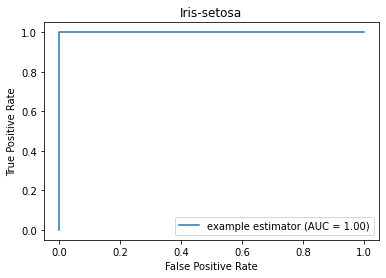

0.8888888888888888


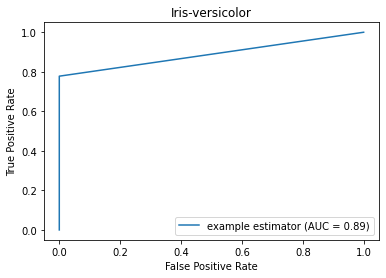

0.9473684210526316


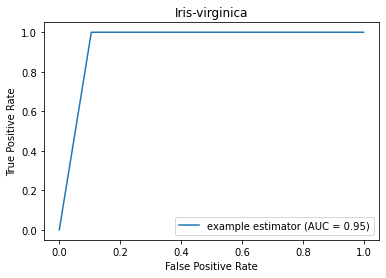

In [ ]:
classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
for i in range(3):
  fpr, tpr, thresholds = metrics.roc_curve(y_test[:, i], y_pred[:, i])
  roc_auc = metrics.auc(fpr, tpr)
  print(roc_auc)
  display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='example estimator')
  display.plot()
  plt.title(classes[i])
  plt.show()

# سوال ۷

<div dir=rtl>
درواقع optimal bayes classifier کلاسی را انتخاب میکند که بزرگترین احتمال رخداد را دارد. همانطور که در سوال های قبلی این تمرین اثابت کردیم، میتوان نشان داد که این طبقه بند درواقع بهینه ترین طبقه بندی را انجام میدهد. بنابراین با دانستن توزیع posterior استفاده از طبقه بند bayes بهترین انتخاب خواهد بود. <br> در مسائل واقعی درواقع ما توزیع posterior را اغلب نخواهیم داشت و آن را تخمین خواهیم زد. naive bayes classifier درواقع optimal bayes classifier را تخمین میزند به طوری که به داده دیده شده نگاه میکند و فرض میکند که feature ها از یکدیگر مستقل هستند. بنابر این طبقه بند naive bayes خودش بهینه نیست ولی روش بهینه را تخمین میزند. اگر در حالت کلی feature ها از یکدیگر مستقل باشند، تخمین naive bayes با optimal bayes یکی خواهد بود.
</div>


In [54]:
breast_cancer = pd.read_csv('/content/drive/MyDrive/Breast_cancer_data.csv')
breast_cancer

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [55]:
breast_cancer.diagnosis.unique()

array([0, 1])

In [56]:
from sklearn.metrics import confusion_matrix
import itertools

def draw_cm(y_true, y_pred, class_names):
  cm = confusion_matrix(y_true, y_pred)
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title('Confusion matrix')
  plt.colorbar()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names, rotation=45)
  plt.yticks(tick_marks, class_names)
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, cm[i, j],
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

<div dir=rtl>
 ابتدا توسط تابع read_csv داده را میخوانیم سپس به پیاده‌سازی کلاس naive bayes classifier میپردازیم . در این کلاس، تابع فیت داده ها را ست میکند و توسط دو تابع دیگر یکی احتمال prior هر کلاس و دیگری mean و variance هر کلاس را بدست می‌اورد. در ادامه تابع predic به محاسبه احتمال posterior تک تک داده ها میپردازد و با توجه به اینکه posterior کدام کلاس برای آن تابع بیشینه است، کلاس مورد نظر را انتخاب میکند. برای محاسبه posterior و پیدا کردن کلاس به تابع calculate_posterior میرویم. در این تابع ابتدا احتمال هر فیچر را بر اساس توزیع گوسی بدست می‌آوریم. برای محاسبه conditional prob این احتمال ها را در یکدیگر ضرب میکنیم زیرا میدانیم در این روش فرض میشود که feature ها از یکدیگر مستقل هستند. در نهایت این احتمال را در prior مان ضرب میکنیم و به اسن صورت postrior هر کلاس محاسبه مس‌شود. حال با پیدا کردن آن کلاسی که posterior بیشتری دارد میتوانیم کلاس داده مورد نظر را بیابیم.
</div>


In [86]:
class naive_baye_classifier():
  def calculate_mean_var(self, X_train, y_train):
    self.mean = X_train.groupby(y_train).apply(np.mean).to_numpy()
    self.var = X_train.groupby(y_train).apply(np.var).to_numpy()

  def calculate_prior(self,X_train, y_train):
    self.prior = (X_train.groupby(y_train).apply(lambda x: len(x)) / X_train.shape[0]).to_numpy()

  def fit(self, X_train, y_train):
    self.labels = np.unique(y_train)
    self.calculate_mean_var(X_train, y_train)
    self.calculate_prior(X_train, y_train)

  def gaussian_pdf(self, X, mean, variance):     
    return np.exp(-(1/2) * (((X - mean)/variance)**2))/(((2 * np.pi)**1/2)*variance)

  def calculate_posterior(self,x):
    posteriors = []
    for class_idx in range(len(self.labels)):
      prior = self.prior[class_idx]
      conditional_prob = np.prod(self.gaussian_pdf(x, self.mean[class_idx], self.var[class_idx]))
      posterior = prior * conditional_prob
      posteriors.append(posterior)
    return self.labels[np.argmax(posteriors)]

  def predict(self, X_train):
    preds = [self.calculate_posterior(x) for x in X_train.to_numpy()]
    return preds

  def score(self, X_test, y_test):
    y_pred = self.predict(X_test)
    accuracy = len(y_test[y_test == y_pred]) / len(y_test)
    return accuracy

In [58]:
def preprocess(X):
  for f in X.columns:
    min = X[f].min()
    max = X[f].max()
    X[f] = (X[f] - min)/(max - min)
  return X

In [ ]:
X = preprocess(breast_cancer)
y = X['diagnosis']
X = X.drop(columns=['diagnosis'])

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<div dir=rtl>
در این بخش از تابع score استفاده میکنیم تا دقت را بیابیم. همچنین confiusion matrix را میتوانید مشاهده کنید.
</div>


train accuracy :  0.7296703296703296
test accuracy :  0.7456140350877193


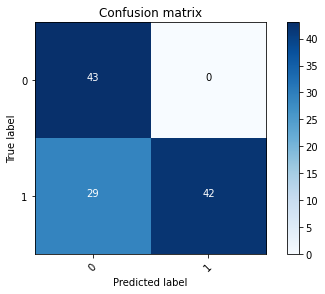

In [87]:
nbc = naive_baye_classifier()
nbc.fit(X_train,y_train)
y_pred = nbc.predict(X_test)
print('train accuracy : ',nbc.score(X_train,y_train))
print('test accuracy : ',nbc.score(X_test,y_test))
draw_cm(y_test,y_pred,[0,1])

<div dir=rtl>در این بخش نیز از کتابخانه آماده sklearn و تابع gaussianNB استفاده میکنیم. همانطور که در زیر میبینید، دقت این طبقه بند از طبقه بندی که ما پیاده‌سازی کردیم بهتر شده است. (متوجه نمی‌شوم چرا!)
</div>


train accuracy :  0.8967032967032967
test accuracy :  0.9473684210526315


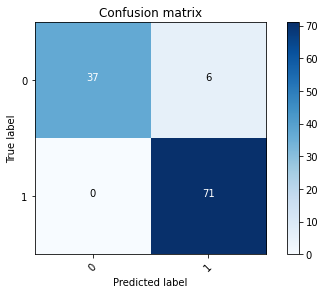

In [66]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('train accuracy : ',clf.score(X_train,y_train))
print('test accuracy : ',clf.score(X_test,y_test))
draw_cm(y_test,y_pred,[0,1])